# Installation

## I don't know what you've installed or how you've installed it, so let's talk before you run any of this.

**OS X folks** can run the following:

* `brew install geos`
* `brew install gdal`
* `brew install spatialindex`
* `pip3 install pillow`
* `pip3 install pysal`
* `pip3 install geopandas`
* `pip3 install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`
* `pip3 install rtree`

For **Windows without Anaconda**, [use this guide](http://geoffboeing.com/2014/09/using-geopandas-windows/) to install through `pip` directly from `whl` files.

# Geopandas Usage

## Importing

You'll be importing

* pandas because you love it
* geopandas for geographic stuff
* `Point` from shapely to help convert CSV files into something geopandas can understand

and `%matplotlib inline` for viewing maps, of course.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker

## Opening a shapefile

Let's open up the Community Districts data. **What kind of file is it?**

In [2]:
ls Community_Districts/

districts.dbf* districts.prj* districts.shp* districts.shx*


In [3]:
districts = gpd.read_file("Community_Districts/districts.shp")

## Introduction to the GeoDataFrame

A GeoDataFrame is *just like a dataframe*, it just... has geographic stuff in it.

In [4]:
districts.dtypes

boro_cd       float64
geometry       object
shape_area    float64
shape_leng    float64
dtype: object

In [5]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311.0,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314.0,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313.0,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


In [6]:
districts["boro_cd"] = districts["boro_cd"].astype(int)

In [7]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


In [8]:
#we can analyze a geo df as we would with a regular df like filtering rows
districts[districts["boro_cd"] > 400]

,boro_cd,geometry,shape_area,shape_leng
1,412,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
11,484,(POLYGON ((-73.93177580884338 40.5578995623848...,1.237923e+08,247830.043391
12,402,"POLYGON ((-73.897923512633 40.75424000267809, ...",1.398945e+08,72182.746967
14,503,(POLYGON ((-74.13319580101383 40.5363067420505...,5.990016e+08,189072.053206
16,482,"POLYGON ((-73.835900721417 40.71164137076879, ...",2.429264e+07,32007.621257
20,407,(POLYGON ((-73.83970053362432 40.7652895884367...,3.283557e+08,139168.786464
26,414,(POLYGON ((-73.91192551909782 40.5658138623772...,1.957296e+08,211877.538189
28,410,(POLYGON ((-73.85722330984366 40.6502786705413...,1.716549e+08,105187.759482
31,409,POLYGON ((-73.81709738756452 40.70402980158765...,1.073240e+08,50763.105913


## Visualizing a shapefile

You can just use `.plot()` to visualize a GeoDataFrame, it's nice and easy.

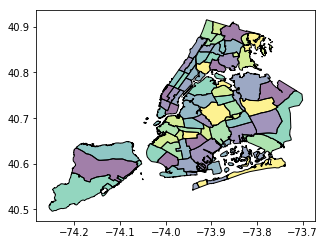

In [9]:
districts.plot(figsize=(5,10))

## Two Different Ways of Changing the CRS

In [10]:
#avoid making mercador maps
#CRS includes a lot of information, datum, the spheroid, projection 

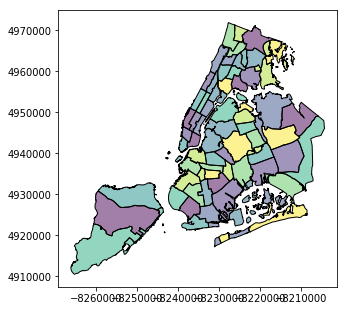

In [11]:
# Go into the crs to convert it...
# ignore the datum and spheroid,
# just change the PROJECTION to MERCATOR
districts.to_crs({'proj': 'merc'}).plot(figsize=(5,10))

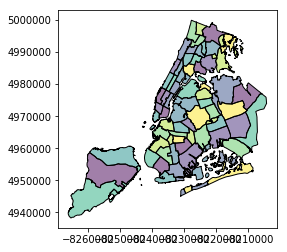

In [12]:
# Give it the SECRET CODE from the PETROLEUM GROUP
# (which you can try to find by googling)
# (or hopefully you have a list because they're
# all very confusingly/similarly named)
districts.to_crs(epsg=3857).plot()

## Opening a CSV of points

geopandas doesn't understand a CSV file of lat/lon points, so you need to convert each line into shapely geometry, then feed that into a new geo dataframe.

Once you do that, you need to set the `crs` to `{'init': 'epsg:4326'}` so it knows what kind of datum/sphereoid/projection you're measuring from.

**Let's try opening the earthquakes CSV**

In [13]:
ls

Classwork 13 - Mapping with geopandas.ipynb
Community_Districts/
Projections presentation.htm
Projections presentation_files/
cb_2016_us_state_500k/
chicago-food-deserts/
earthquakes_1.0_day.csv
mapping-with-geopandas.ipynb
wafflehouses.csv*
wafflehouses.json


In [14]:
pd.set_option("display.max_columns",100)
df = pd.read_csv("earthquakes_1.0_day.csv")

In [15]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,ak,ak15880850,2017-05-03T02:03:56.653Z,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,nc,nc72796130,2017-05-03T01:57:52.525Z,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,ak,ak15880839,2017-05-03T01:30:12.544Z,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,nc,nc72796125,2017-05-03T01:57:30.367Z,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,nc,nc72796120,2017-05-03T01:29:04.429Z,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc


In [16]:
def make_point(row):
    return Point(row.longitude, row.latitude)

# Go through every row, and make a point out of its lat and lon
points = df.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
earthquakes = gpd.GeoDataFrame(df, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
earthquakes.crs = {'init': 'epsg:4326'}

# Let's look at the first few
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,ak,ak15880850,2017-05-03T02:03:56.653Z,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,nc,nc72796130,2017-05-03T01:57:52.525Z,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,ak,ak15880839,2017-05-03T01:30:12.544Z,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,nc,nc72796125,2017-05-03T01:57:30.367Z,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,nc,nc72796120,2017-05-03T01:29:04.429Z,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


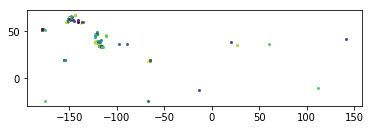

In [17]:
earthquakes.plot()

## Opening a CSV of points using `lambda`

We used `.apply` and a function up above, but that function only does one thing! Let's learn something new called `lambda`, it's a one-line function we can use with `.apply`.

In [21]:
# Read in the CSV
df = pd.read_csv("earthquakes_1.0_day.csv")

# Use lambda and apply to create long, lat points for every row
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

# Turn the pandas df into a geo df
earthquakes = gpd.GeoDataFrame(df, geometry=points)

# Remember to give it a projection
earthquakes.crs = {'init': 'epsg:4326'}

earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,ak,ak15880850,2017-05-03T02:03:56.653Z,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,nc,nc72796130,2017-05-03T01:57:52.525Z,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,ak,ak15880839,2017-05-03T01:30:12.544Z,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,nc,nc72796125,2017-05-03T01:57:30.367Z,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,nc,nc72796120,2017-05-03T01:29:04.429Z,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


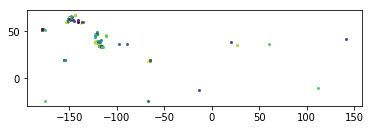

In [24]:
earthquakes.plot()

## Using the built-in map

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

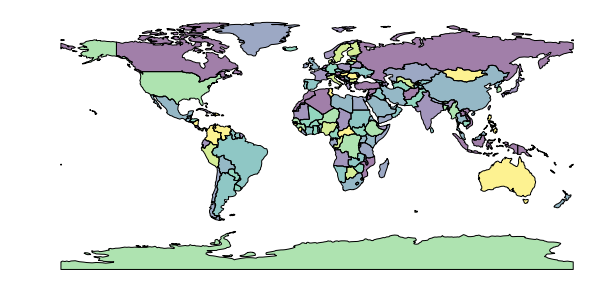

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,5))
ax.axis('off')

In [26]:
world.crs

{'init': 'epsg:4326'}

# Styling your visuals

## Setting size, line and shape colors, widths, axes

* `linewidth`
* `color`
* `edgecolor`
* `ax.axis`

Let's plot the community districts!

(-8269186.9760319712,
 -8201155.1235175692,
 4935220.9945818782,
 5002970.2511551529)

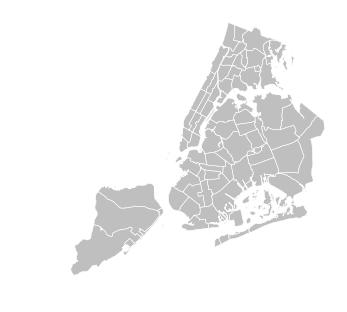

In [43]:
ax = districts.to_crs(epsg=3857).plot(figsize=(5,10), linewidth=0.5, edgecolor="white", color="grey")
ax.axis("off")

Let's plot the world!

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

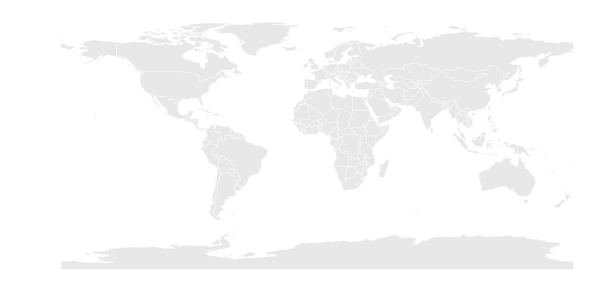

In [27]:
ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
ax.axis('off')

## Setting the projection

You can use `to_crs` to convert to different projections. In typical pandas fashion, you can do it a lot of ways, but the easiest is to send a `epsg=` and feed it the correct EPSG code.

You'll also probably want to do an `ax.axis('off')` to turn off the splines and axes!

What are the EPSG codes for some common projections?

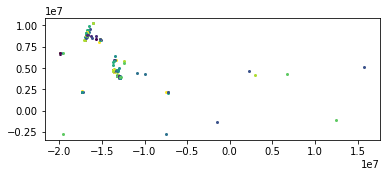

In [84]:
earthquakes.to_crs(epsg=3857).plot()

## Styling markers

* markersize
* color
* alpha

(-21697732.794454664,
 17587995.30555227,
 -3435188.7262695674,
 10907636.24243013)

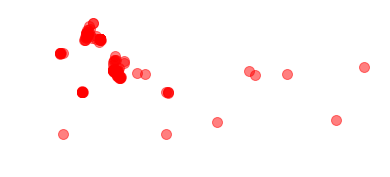

In [82]:
ax = earthquakes.to_crs(epsg=3857).plot(markersize=10, color="red",alpha=0.5)
ax.axis("off")

## Plotting multiple layers of data

Let's try plotting the earthquakes on top of the world. **Save your first plot as `ax` and send it to the next one as `ax=ax`.**

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

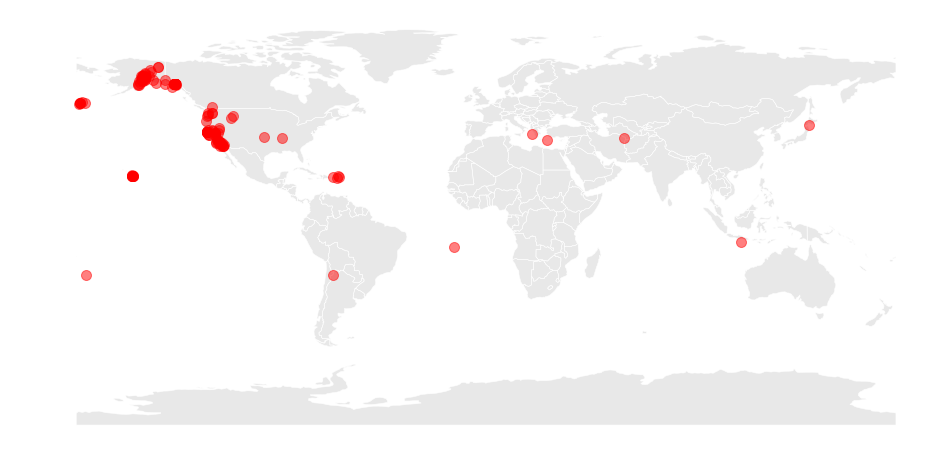

In [89]:
#for maps that provide context, make the color light grey and the edgecolor white so it will not compete
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,8))
earthquakes.plot(markersize=10, color='red', alpha=0.5, ax=ax)
ax.axis('off')

# Colormaps/ramps

## Auto colormap

Giving your `plot` a `column` and a `cmap` will colorize your values. You can try `plasma` as your color map, or check out [more here](https://matplotlib.org/examples/color/colormaps_reference.html).

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

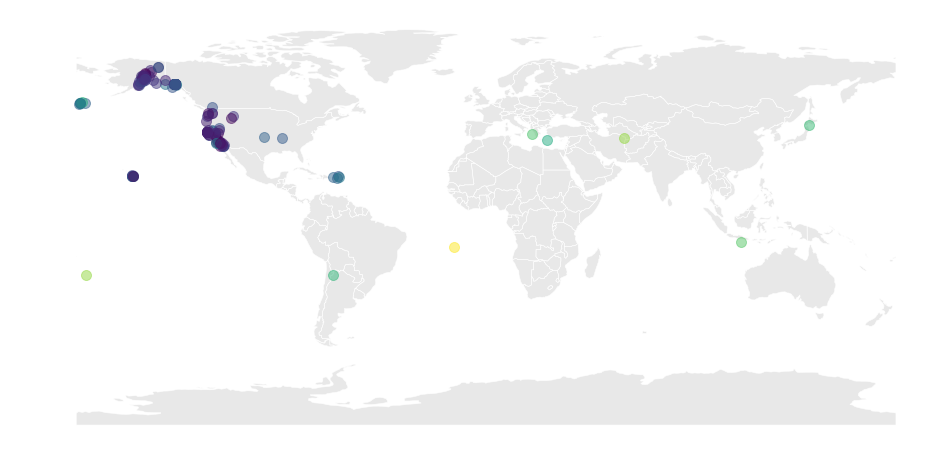

In [85]:
#color by magnitude of the earthquake using column ="mag"
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,8))
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='mag')
ax.axis('off')

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

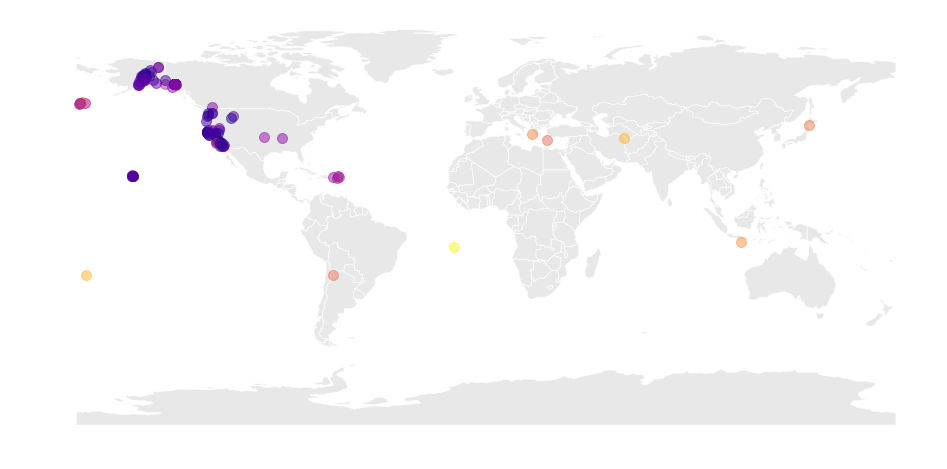

In [86]:
#let's change the color scheme using cmap
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,8))
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='mag', cmap='plasma')
ax.axis('off')

## Auto colormap again

We can also try with the world. What's the `gdp_md_est` column looking like?

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

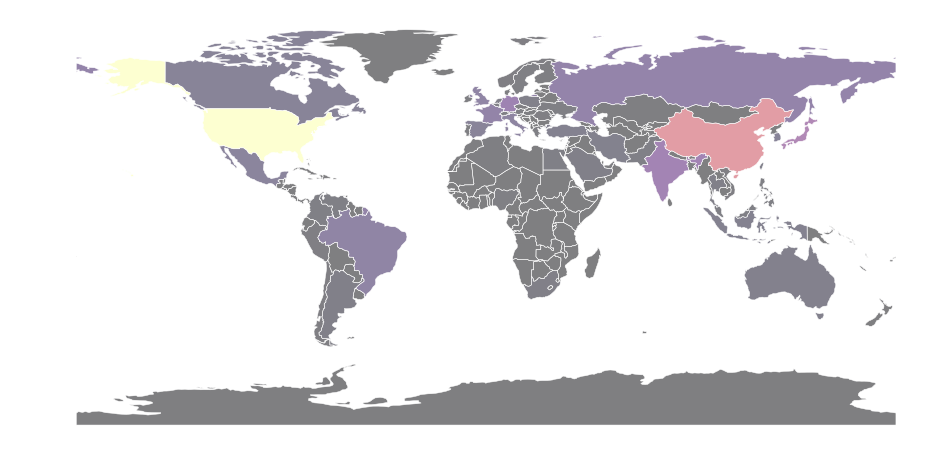

In [100]:
#coropleth map
ax = world.plot(column='gdp_md_est', cmap="inferno", linewidth=0.5, edgecolor='white', figsize=(20,8))
ax.axis("off")

# Setting the projection by `proj` with named projections

Instead of using an EPSG code, you can also set the projection with `to_crs` by  `.to_crs({'proj': 'merc'})` or something similar.

I don't recommend this method, but it is a little friendlier than EPSG codes.

### Plot the world with the default projection

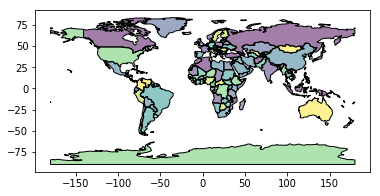

In [102]:
world.plot()

### Plot the world with Mercator (merc)

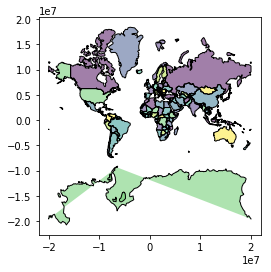

In [103]:
world.to_crs({'proj': 'merc'}).plot()

### Plot the world with [Transverse Mercator](https://en.wikipedia.org/wiki/Transverse_Mercator_projection) (tmerc)

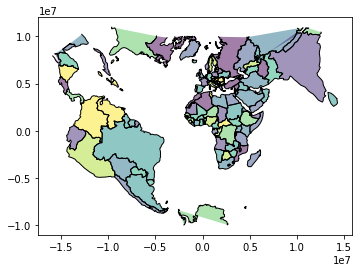

In [104]:
world.to_crs({'proj': 'tmerc'}).plot()

### Plot the world with Albers Equal Area (aea)

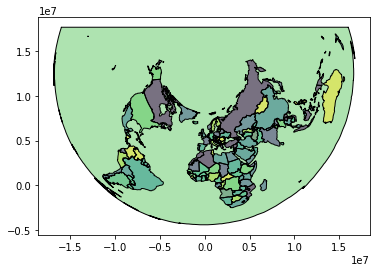

In [105]:
world.to_crs({'proj': 'aea'}).plot()

# Spatial join

# Dataset 1: States

Let's import the states and clean them up a little bit. we need to clean the data up a little

In [107]:
ls cb_2016_us_state_500k/

cb_2016_us_state_500k.cpg             cb_2016_us_state_500k.shp.ea.iso.xml*
cb_2016_us_state_500k.dbf             cb_2016_us_state_500k.shp.iso.xml*
cb_2016_us_state_500k.prj             cb_2016_us_state_500k.shp.xml*
cb_2016_us_state_500k.shp             cb_2016_us_state_500k.shx


In [108]:
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")

In [145]:
states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


In [146]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]

# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]

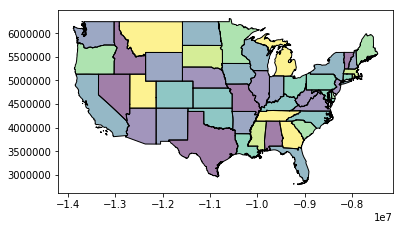

In [147]:
states.to_crs({"proj": "merc"}).plot()

## Dataset 2: Waffle House

Read in `wafflehouses.csv`, and convert it to a GeoDataFrame.

In [148]:
wafflehouses = pd.read_csv("wafflehouses.csv")

In [149]:
wafflehouses.dtypes

location     object
lat         float64
long        float64
score         int64
dtype: object

In [150]:
points= wafflehouses.apply(lambda row: Point(row.long, row.lat), axis=1)

In [151]:
wafflehouses_gdf = gpd.GeoDataFrame(wafflehouses, geometry=points)

In [152]:
wafflehouses_gdf.crs = {"init": "epsg:4326"}

### Plot the locations, coloring based on the 'score' column.

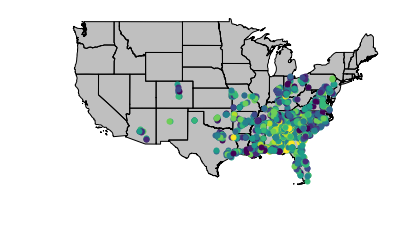

In [154]:
ax = states.to_crs({"proj": "merc"}).plot(color="grey")
ax.axis("off")
wafflehouses_gdf.to_crs({'proj': 'merc'}).plot(markersize= 5, column="score", figsize=(20,8), ax=ax)

# The actual spatial join

### Is the CRS of the states the same as the CRS of the Waffle House locations?

In [159]:
wafflehouses_gdf.crs

{'init': 'epsg:4326'}

In [160]:
states.crs

{'init': 'epsg:4269'}

### If not, we'll force them to match using `.to_crs`

In [161]:
converted_wafflehouses = wafflehouses_gdf.to_crs(states.crs)

In [164]:
converted_wafflehouses.crs

{'init': 'epsg:4269'}

In [163]:
states.crs

{'init': 'epsg:4269'}

### And now we can join

In [173]:
converted_wafflehouses.head()

,location,lat,long,score,geometry
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269)
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627)
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078)
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903)
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025)


In [180]:
converted_wafflehouses.shape

(1803, 5)

In [174]:
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."


In [166]:
#spatially joining the wafflehouses with the states gdf
#http://geopandas.org/mergingdata.html
wafflehouses_with_states = gpd.sjoin(converted_wafflehouses, states, how='left', op='within')

In [172]:
wafflehouses_with_states.head()

,location,lat,long,score,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269),9,0400000US13,1.491698e+11,4.741101e+09,13,00,Georgia,13,01705317,GA
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903),48,0400000US47,1.067977e+11,2.355189e+09,47,00,Tennessee,47,01325873,TN
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025),49,0400000US48,6.766335e+11,1.902599e+10,48,00,Texas,48,01779801,TX


In [175]:
#by doing this spatial join, we can get information with state names and we can make coropleths
#e.g. how many wafflehouses are in each state?
wafflehouses_with_states["NAME"].value_counts()

Georgia           416
North Carolina    165
South Carolina    163
Florida           152
Alabama           147
Tennessee         114
Texas             104
Mississippi        87
Louisiana          79
Ohio               72
Kentucky           63
Virginia           50
Arkansas           45
Missouri           40
Indiana            24
Arizona            17
Oklahoma           16
Pennsylvania       11
Maryland           11
Colorado           10
Kansas              5
West Virginia       4
Delaware            3
Illinois            2
New Mexico          2
Name: NAME, dtype: int64

## Doing things with spatially joined data

* What column do we use for color?
* Add a legend with `legend=True`
* Something is going to go wrong, though!

In [182]:
converted_wafflehouses[converted_wafflehouses["geometry"].isnull()]

,location,lat,long,score,geometry


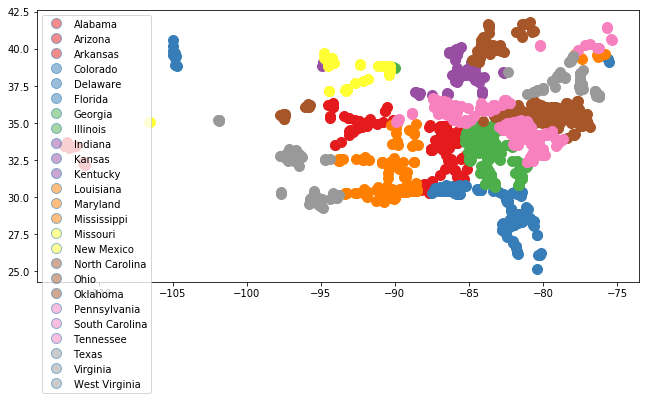

In [196]:
# We can plot the wafflehouses by the state each belongs to
# We need to dropna because some of our wafflehouses don't have geometry that fits our states geometry
ax = wafflehouses_with_states.dropna().plot(column="NAME", markersize=10, figsize=(20,5), legend=True)

## What if we reverse the spatial join and make it 'contains'?

How is this different than what we did before?

In [204]:
states_with_wafflehouses = gpd.sjoin(states,converted_wafflehouses, how='left', op='contains')

In [205]:
wafflehouses_with_states.shape

(1803, 15)

In [206]:
states_with_wafflehouses.shape

(1826, 15)

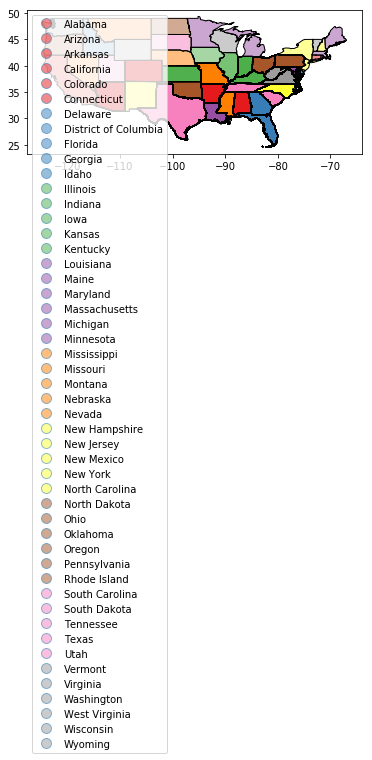

In [212]:
states_with_wafflehouses.plot(column="NAME", legend=True)

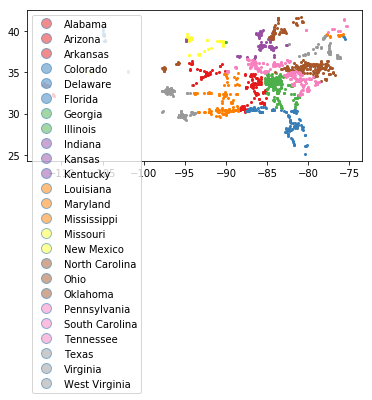

In [222]:
wafflehouses_with_states.dropna().plot(column="NAME", legend=True)

## Spatial joins, option 1

We need to use `.contains` to say "find me all of the waffle houses inside of this one specific state". We'll use `.sum()` to count the number inside, but you could also do something like `['score'].mean()` etc.

This is slower than actually using `.sjoin`, but we're going to work with it for the moment.

### Let's try it with one state first

In [215]:
# Give me the first state!
state = states.loc[0]

# Look at the wafflehouses...

# are they inside of the state's geometry?
converted_wafflehouses.within(state.geometry).sum()

147

### Now, let's try it with every state

In [217]:
states['wafflehouse_count'] = states.apply(lambda state: converted_wafflehouses.within(state.geometry).sum(), axis=1)
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,wafflehouse_count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",17
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",45
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",0
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",10


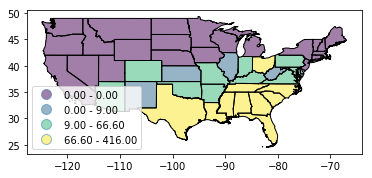

In [218]:
#now that we've created a column called wafflehouse_count, we can now plot states based on this column
states.plot(column='wafflehouse_count', scheme='quantiles', legend=True)

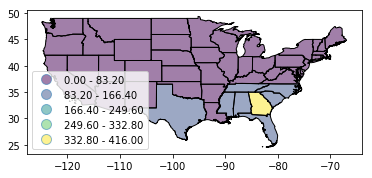

In [219]:
states.plot(column='wafflehouse_count', scheme='equal_interval', legend=True)

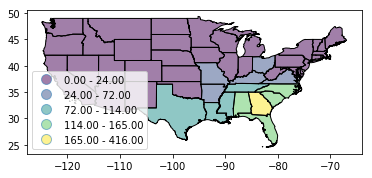

In [220]:
states.plot(column='wafflehouse_count', scheme='fisher_jenks', legend=True)

# Saving the results

You want to look at this stuff in Leaflet, right? For that we'll need to save. Geopandas supports practically _every_ file format you could ever want.

In [221]:
wafflehouses_with_states.to_file("wafflehouses.json", driver='GeoJSON')